In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

import sys
sys.path.append('../')
from src import data

In [178]:
fish_data = pd.read_csv("../auxdata/spawning-predictions-std.csv")

In [179]:
had_1980_mar = fish_data[(fish_data.Species == "Haddock") & (fish_data.year == 1980) & (fish_data.month == 3)]
had_1980_mar.head()

,Unnamed: 0,lon,lat,year,month,predicted,Species,pred_std
507119,507119,1699879.750,420500.31250,1980,3,0.000025,Haddock,1.157872e-08
507120,507120,1709910.000,409690.18750,1980,3,0.000018,Haddock,8.241441e-09
507121,507121,1715777.875,403368.03125,1980,3,0.000258,Haddock,1.191656e-07
507122,507122,1722603.125,395906.81250,1980,3,0.001748,Haddock,8.068667e-07
507123,507123,1730039.125,387611.34375,1980,3,0.000475,Haddock,2.190678e-07


In [180]:
had_1980_mar['pred_std'].sum()

1.0

In [181]:
lons = had_1980_mar['lon']
lats = had_1980_mar['lat']
pred = had_1980_mar['pred_std']

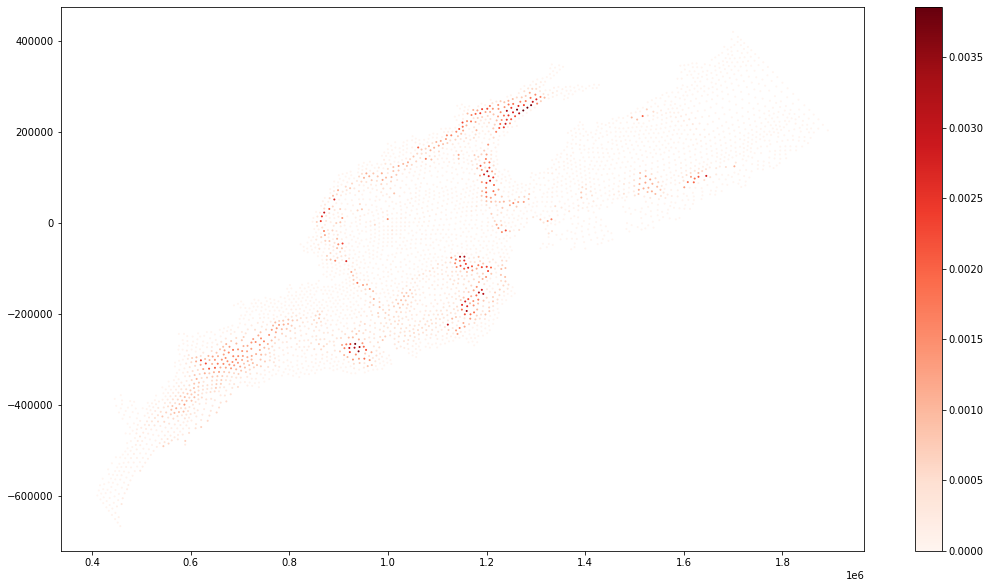

In [182]:
fig, ax = plt.subplots(figsize=(18, 10))
s = ax.scatter(lons, lats, c=pred, s=1, cmap="Reds")
plt.colorbar(s)

In [134]:
N = 1000000

spawn_start = 60
spawn_end = 151

spawn_mean = (spawn_start+spawn_end)/2
spawn_std = (spawn_end - spawn_start)/6

dates = np.random.normal(spawn_mean, spawn_std, N)
dates = np.round(dates)

In [8]:
from datetime import datetime, timedelta

In [135]:
def get_month(dayofyear):
    return (datetime(1984, 1, 1) + timedelta(dayofyear+1)).month

f = np.vectorize(get_month)

In [136]:
months = f(dates)

In [11]:
month_props = np.zeros(shape=(12,))

unique = np.unique(months)
for u in unique:
    mask = months == u
    total = mask.sum()
    month_props[u-1] = total/len(months)
        
month_props

array([0.      , 0.000944, 0.144882, 0.67596 , 0.176719, 0.001495,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ])

In [12]:
month_masks = {}
month_dates = {}
for i in range(1, 13):
    mask = months == i
    month_masks[i] = mask
    month_dates[i] = dates[mask]

In [13]:
fish_data[fish_data.Species == "Haddock"].describe()

,Unnamed: 0,lon,lat,year,month,predicted,pred_std
count,4.052534e+06,4.052534e+06,4.052534e+06,4.052534e+06,4.052534e+06,4.052534e+06,4.052534e+06
mean,6.078800e+06,-6.907817e+01,4.188160e+01,1.984465e+03,6.489931e+00,2.939114e-01,2.961110e-05
std,1.169866e+06,2.752371e+00,1.562107e+00,2.908355e+00,3.457723e+00,8.866197e-01,7.838021e-05
min,4.052534e+06,-7.568433e+01,3.613908e+01,1.980000e+03,1.000000e+00,2.220446e-16,7.662243e-21
25%,5.065667e+06,-7.075822e+01,4.107991e+01,1.982000e+03,3.000000e+00,8.367205e-04,4.083819e-07
50%,6.078800e+06,-7.000417e+01,4.153381e+01,1.984000e+03,7.000000e+00,1.417407e-02,3.334461e-06
75%,7.091934e+06,-6.764238e+01,4.283489e+01,1.987000e+03,9.000000e+00,1.058172e-01,1.783726e-05
max,8.105067e+06,-5.780016e+01,4.614595e+01,1.989000e+03,1.200000e+01,8.433064e+00,4.692273e-03


In [208]:
had = fish_data[(fish_data.Species == "Haddock") & (fish_data.year == 1984)]
had.head()

,Unnamed: 0,lon,lat,year,month,predicted,Species,pred_std
700790,700790,1699879.750,420500.31250,1984,1,0.001078,Haddock,2.744354e-07
700791,700791,1709910.000,409690.18750,1984,1,0.001406,Haddock,3.578396e-07
700792,700792,1715777.875,403368.03125,1984,1,0.012940,Haddock,3.294541e-06
700793,700793,1722603.125,395906.81250,1984,1,0.071804,Haddock,1.828103e-05
700794,700794,1730039.125,387611.34375,1984,1,0.020101,Haddock,5.117699e-06


In [209]:
lons = had['lon'].to_numpy()
lats = had['lat'].to_numpy()
month = had['month'].to_numpy()
pred = had['pred_std'].to_numpy()

In [193]:
xs, ys = data.project(lons, lats)

In [210]:
d = np.hstack((lons.reshape(-1, 1), lats.reshape(-1, 1), month.reshape(-1, 1), pred.reshape(-1, 1)))

In [211]:
len(d)

49300

In [212]:
def place_particles(x, y, n):
    r = 1000
    # random angle
    alpha = 2 * math.pi * np.random.random(n)
    # random radius
    rad = r * np.sqrt(np.random.random(n))
    # calculating coordinates
    px = rad * np.cos(alpha) + x
    py = rad * np.sin(alpha) + y
    return px, py

In [213]:
te = d[:]
#te[90000:90010]

In [214]:
def seed_particles(pos):
    #print(pos)
    x, y, m, p = pos[0], pos[1], pos[2], pos[3]
    n = N*p*month_props[m.astype(int)-1]
    n = np.round(n).astype(int)
    px, py = place_particles(x, y, n)
    #mask = month_masks[int(m)]
    date=month_dates[int(m)]
    ds=np.random.choice(date, size=px.size)
    
    max_depth = min(pos_depths.get((x, y), 1e10), 130)
    depths = np.random.uniform(0, max_depth, size=px.size)
    
    inter = np.ravel(np.column_stack((px, py, depths, ds)))
    return inter

In [215]:
pos = np.array([seed_particles(x) for x in te], dtype=object)
pos = pos[np.array([y.size>0 for y in pos])]

In [216]:
pos = np.concatenate(pos)
pos = pos.reshape(-1, 4)

In [217]:
pos

array([[ 4.62703546e+05, -6.43789209e+05,  4.96684538e+01,
         5.10000000e+01],
       [ 4.66526793e+05, -6.52411034e+05,  8.29015148e+01,
         5.30000000e+01],
       [ 5.04948110e+05, -5.68835373e+05,  1.02298079e+02,
         5.10000000e+01],
       ...,
       [ 8.69569630e+05, -6.35669364e+04,  3.63713542e+01,
         1.52000000e+02],
       [ 8.76890654e+05, -8.85315138e+04,  5.30147226e+01,
         1.53000000e+02],
       [ 8.60723386e+05, -5.70337751e+04,  1.16385261e+02,
         1.51000000e+02]])

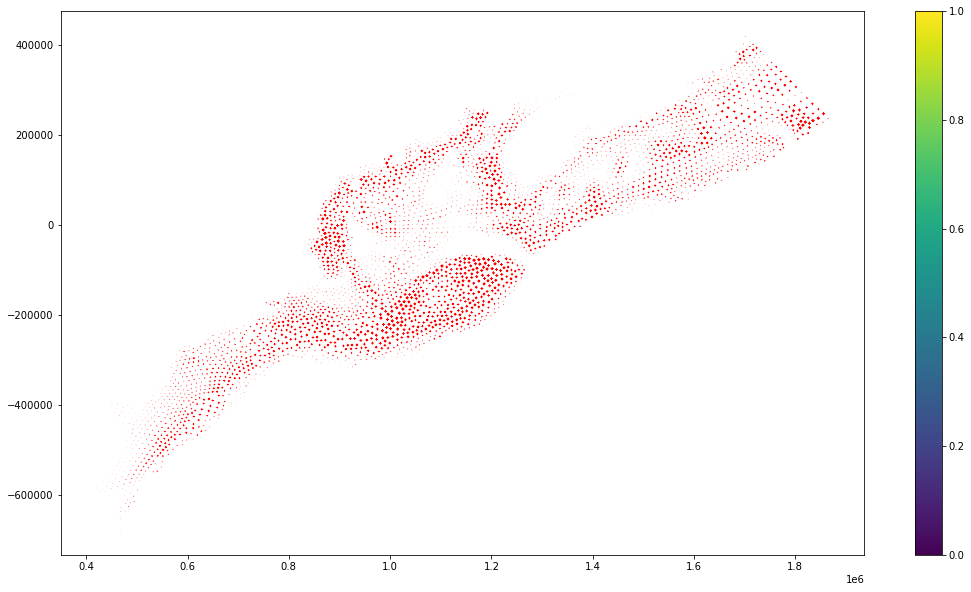

In [223]:
month=5
mi, ma = np.min(dates[np.where(months == month)]), np.max(dates[np.where(months == month)])
mask = np.logical_and(pos[:, -1] > mi-1, pos[:, -1] < ma+1)
fig, ax = plt.subplots(figsize=(18, 10))
s = ax.scatter(pos[mask, 0], pos[mask, 1], c="r", s=0.001, cmap="Reds")
plt.colorbar(s)

In [80]:
len(pos[mask, 2])

720

In [20]:
env_data = pd.read_csv("../auxdata/environmental-data/environmental_data_198001.csv", names=["lon", "lat", "sfc_temp", "sfc_salt", "depth"])

In [21]:
env_data

,lon,lat,sfc_temp,sfc_salt,depth
0,-59.890202,46.094418,2.538920,31.645929,7.427900
1,-59.810692,46.145954,2.628548,31.666399,8.645000
2,-59.752682,46.090115,2.617887,31.710918,5.010400
3,-59.701324,46.038551,2.631684,31.774105,5.722500
4,-59.637531,45.975704,2.566618,31.845774,32.664902
...,...,...,...,...,...
48446,-73.959396,41.611889,0.800000,0.800081,3.000000
48447,-73.945496,41.610481,0.800000,0.800064,3.000000
48448,-73.952362,41.615002,0.800000,0.800043,3.000000
48449,-73.956787,41.619492,0.800000,0.800037,3.000000


In [22]:
env_lons, env_lats, env_depths = env_data['lon'].to_numpy(), env_data['lat'].to_numpy(), env_data['depth'].to_numpy() 

In [23]:
env_xs, env_ys = data.project(env_lons, env_lats)
positions = list(zip(env_xs, env_ys))    

In [24]:
pos_depths = {}

for i, p in enumerate(positions):
    pos_depths[p] = env_depths[i]

In [25]:
pos_depths

{(1694489.7917388012, 413970.56945515564): 7.427899837493895,
 (1699879.7028542173, 420500.3266916744): 8.64500045776367,
 (1705179.501047311, 414890.3296272595): 5.010399818420409,
 (1709910.0478079002, 409690.20079911913): 5.722499847412109,
 (1715777.9115122482, 403368.03512007726): 32.66490173339844,
 (1722603.0980912575, 395906.808229465): 74.51830291748047,
 (1730039.1404808424, 387611.3554149951): 117.39219665527345,
 (1737004.2507039802, 380188.4147159844): 176.1977996826172,
 (1744942.9212757433, 371707.0861450482): 194.01730346679685,
 (1752035.9521691885, 363692.83757479896): 121.14900207519534,
 (1761283.9328907058, 353678.8275835229): 101.03060150146483,
 (1770600.2653632488, 343373.169121033): 100.16999816894531,
 (1780888.2410732522, 331966.3786665933): 99.64959716796876,
 (1922789.4771558112, 169479.77686771468): 3123.841552734375,
 (1932699.3179126661, 158330.05461697845): 3475.8457031249995,
 (1941538.067970815, 147236.60036648417): 3697.3076171875,
 (1950102.32116919

In [38]:
np.where(env_lats == 1699879.702854216)

(array([], dtype=int64),)

In [39]:
min(None, 10)

TypeError: '<' not supported between instances of 'int' and 'NoneType'

In [338]:
def initialize_particles(df, N, spawn_start, spawn_end):
    
    def seed_particles(pos):
        #print(pos)
        x, y, m, p = pos[0], pos[1], pos[2], pos[3]
        n = N*p*month_props[m.astype(int)-1]
        n = np.round(n).astype(int)
        px, py = place_particles(x, y, n)
        #mask = month_masks[int(m)]
        date=month_dates[int(m)]
        ds=np.random.choice(date, size=px.size)

        max_depth = min(pos_depths.get((x, y), 1e10), 130)
        depths = np.random.uniform(0, max_depth, size=px.size)

        inter = np.ravel(np.column_stack((px, py, depths, ds)))
        return inter
    
    # Generate spawning dates for each particles
    spawn_mean = (spawn_start+spawn_end)/2  # Assume mean is halfway through season
    spawn_std = (spawn_end - spawn_start)/6 # 99% of particle spawned in season
    dates = np.random.normal(spawn_mean, spawn_std, N)
    dates = np.round(dates) # Round to nearest whole number day

    # Convert days of year into months
    to_months = np.vectorize(get_month)
    spawning_months = to_months(dates)

    # Compute proportion of dates in each month
    month_props = np.zeros(shape=(12,))
    unique = np.unique(spawning_months)
    for u in unique:
        mask = spawning_months == u
        total = mask.sum()
        month_props[u-1] = total/len(spawning_months)

    # Precompute the dates that fall in each month
    month_dates = {}
    for i in range(1, 13):
        mask = spawning_months == i
        month_dates[i] = dates[mask]

    # Pull relevant data from dataframe
    lons = df['lon'].to_numpy()
    lats = df['lat'].to_numpy()
    #xs, ys = data.project(lons, lats) # Project lat/lon into northing/easting coords
    months = df['month'].to_numpy()
    pred = df['pred_std'].to_numpy()
    d = np.hstack((lons.reshape(-1, 1), lats.reshape(-1, 1), months.reshape(-1, 1), pred.reshape(-1, 1)))

    # Seed particles at each position x, y for each month
    pos = np.array([seed_particles(x) for x in d], dtype=object)
    pos = pos[np.array([y.size>0 for y in pos])] # Remove positions at which no particles were seeded
    pos = np.concatenate(pos) # Join position arrays into single 1D array
    pos = pos.reshape(-1, 4) # Reshape position array into 4 columns (x, y, h, date)

    return pos, dates, spawning_months

In [339]:
had_particles, dates, months = initialize_particles(had, 1000000, 60, 151)

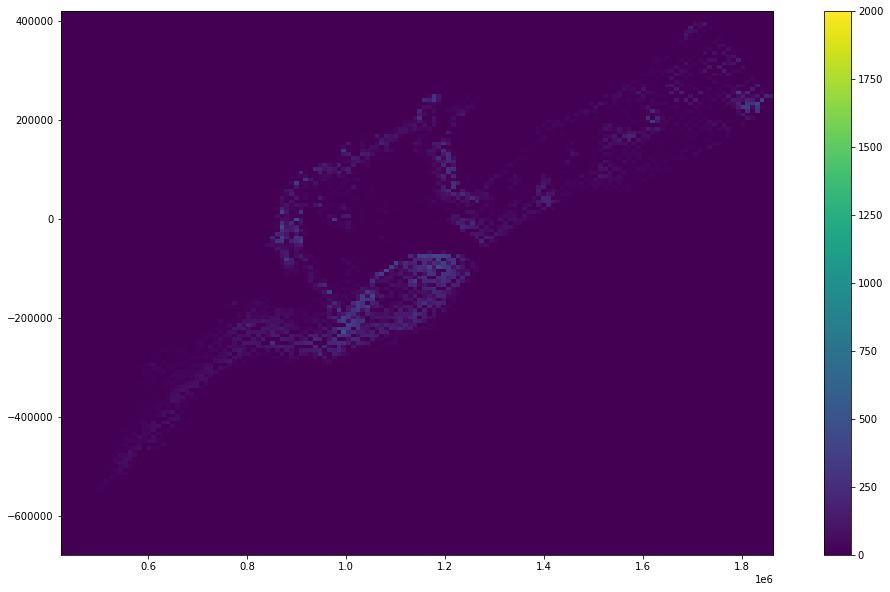

In [390]:
month=5

mi, ma = np.min(dates[np.where(months == month)]), np.max(dates[np.where(months == month)])
mask = np.logical_and(had_particles[:, -1] > mi-1, had_particles[:, -1] < ma+1)

h, xes, yes = np.histogram2d(had_particles[mask, 0], had_particles[mask, 1], bins=150)
h = h.T

fig, ax = plt.subplots(figsize=(18, 10))

im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[xes[0], xes[-1], yes[0], yes[-1]], vmin=0, vmax=2000)
plt.colorbar(im, )

In [348]:
cod = fish_data[(fish_data.Species == "Atlantic Cod") & (fish_data.year == 1984)]
cod_particles, dates, months = initialize_particles(cod, 1000000, 0, 151)

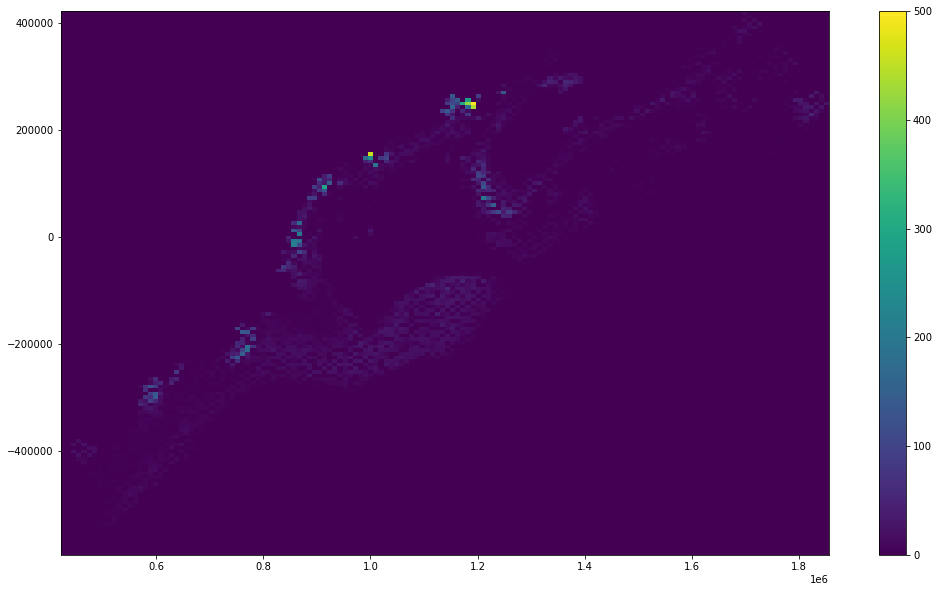

In [355]:
month=5

mi, ma = np.min(dates[np.where(months == month)]), np.max(dates[np.where(months == month)])
mask = np.logical_and(cod_particles[:, -1] > mi-1, cod_particles[:, -1] < ma+1)

h, xes, yes = np.histogram2d(cod_particles[mask, 0], cod_particles[mask, 1], bins=150)
h = h.T

fig, ax = plt.subplots(figsize=(18, 10))

im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[xes[0], xes[-1], yes[0], yes[-1]], vmin=0, vmax=500)
plt.colorbar(im, )

In [396]:
flo = fish_data[(fish_data.Species == "Yellowtail Flounder") & (fish_data.year == 1984)]
flo_particles, dates, months = initialize_particles(flo, 1000000, 120, 212)

181.0 211.0


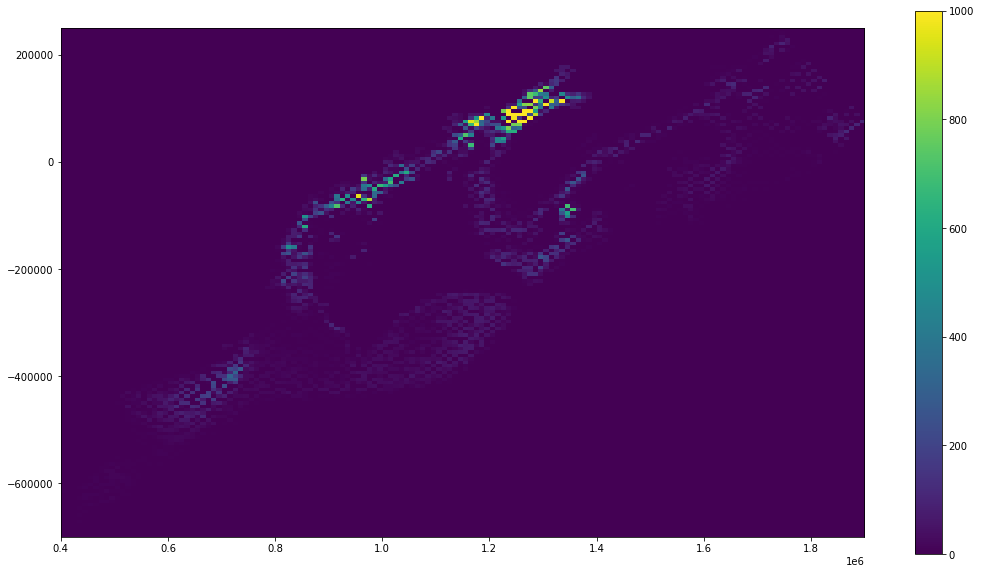

In [399]:
month=7

mi, ma = np.min(dates[np.where(months == month)]), np.max(dates[np.where(months == month)])
print(mi, ma)
mask = np.logical_and(flo_particles[:, -1] > mi-1, flo_particles[:, -1] < ma+1)

h, xes, yes = np.histogram2d(flo_particles[mask, 0], flo_particles[mask, 1], bins=150)
h = h.T

fig, ax = plt.subplots(figsize=(18, 10))

im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[0.4e6, 1.9e6, -700000, 250000], vmin=0, vmax=1000)
plt.colorbar(im)

In [400]:
mac = fish_data[(fish_data.Species == "Atlantic Mackerel") & (fish_data.year == 1984)]
mac_particles, dates, months = initialize_particles(mac, 1000000, 121, 212)

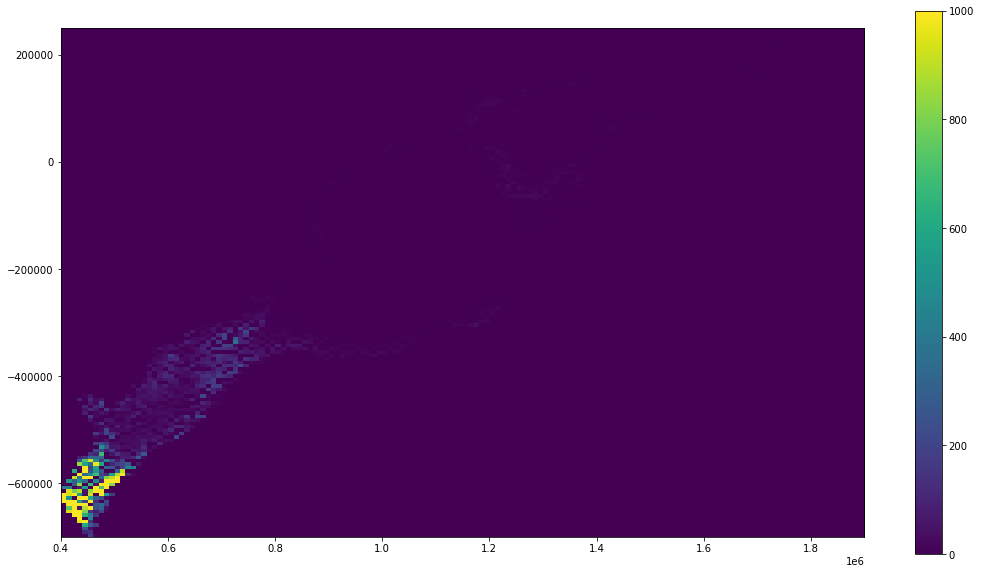

In [404]:
month=5

mi, ma = np.min(dates[np.where(months == month)]), np.max(dates[np.where(months == month)])
mask = np.logical_and(mac_particles[:, -1] > mi-1, mac_particles[:, -1] < ma+1)

h, xes, yes = np.histogram2d(mac_particles[mask, 0], mac_particles[mask, 1], bins=150)
h = h.T

fig, ax = plt.subplots(figsize=(18, 10))

im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[0.4e6, 1.9e6, -700000, 250000], vmin=0, vmax=1000)
plt.colorbar(im, )

In [406]:
but = fish_data[(fish_data.Species == "American Butterfish") & (fish_data.year == 1984)]
but_particles, dates, months = initialize_particles(but, 1000000, 121, 243)

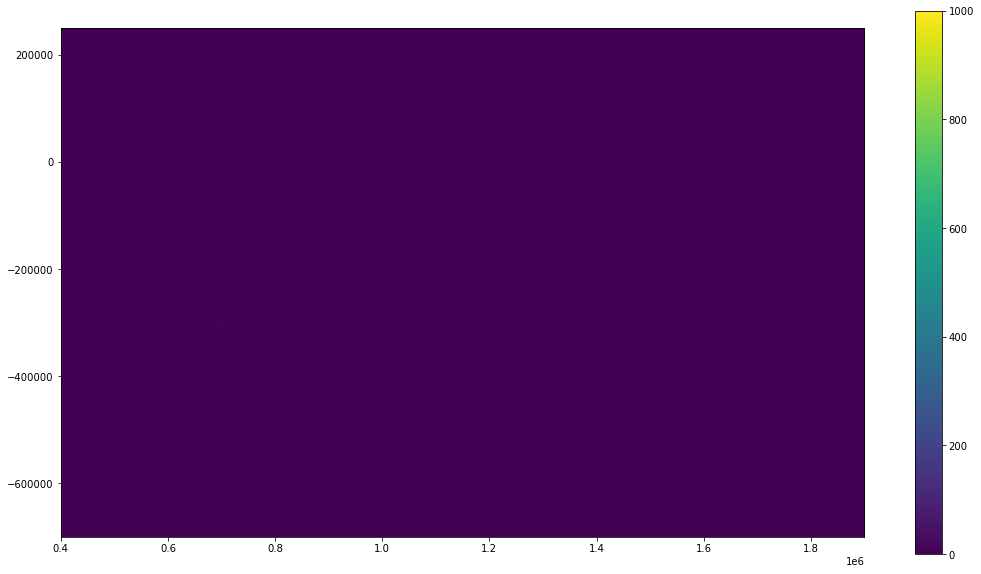

In [411]:
month=9

mi, ma = np.min(dates[np.where(months == month)]), np.max(dates[np.where(months == month)])
mask = np.logical_and(but_particles[:, -1] > mi-1, but_particles[:, -1] < ma+1)

h, xes, yes = np.histogram2d(but_particles[mask, 0], but_particles[mask, 1], bins=150)
h = h.T

fig, ax = plt.subplots(figsize=(18, 10))

im = ax.imshow(h, interpolation='nearest', origin='lower', extent=[0.4e6, 1.9e6, -700000, 250000], vmin=0, vmax=1000)
plt.colorbar(im, )